## 6. TF-IDF Analysis

#### Compare boutique reviews in search term or induvidualy, by words and their star ratings

In [3]:
''' Import libraries'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('talk')
import re
import nltk
import string

from gensim.models import Phrases
from gensim.models import Word2Vec
from gensim.models.phrases import Phraser
from gensim.summarization.textcleaner import split_sentences

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.manifold import TSNE

from sklearn.decomposition import PCA
from matplotlib import pyplot

from textblob import TextBlob, Word, Blobber
# to install textblob in your conda packages:
# 1. go to anaconda prompt
# 2. cd Anaconda3>Scripts>conda install -c conda-forge textblob
import numpy as np
import nltk
nltk.download('punkt')
nltk.download('words')
nltk.download('stopwords')
from nltk import word_tokenize,sent_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\farnaz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\farnaz\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\farnaz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Import the dataframe contained reviews "boutique_review" from web scraping notebook  to start analysing

In [4]:
#import the final boutique_review dataframe from the web scraping notebooke:
import pickle

with open('boutique_reviews.pickle','rb') as f_read:
    boutique_reviews = pickle.load(f_read)

#set wider columns to check the reviews:
pd.options.display.max_colwidth = 500  

#delete unnecessary columns like review_counts:
del boutique_reviews['review_counts']

boutique_reviews.head()

,boutique_names,number_reviews,url_address,reviews,review_dates,review_ratings
0,Kisha Studio Fashion Boutique,120,https://www.yelp.com/biz/kisha-studio-fashion-boutique-san-francisco-2?osq=Clothing+Boutiques,Oh my goodness im so in lovewith the dress that I received from kisha studio today. I ordered a black dress that I saw on Instagram on Tuesday the 21st of April it arrived at my mailbox in 4 days. How awesome is that. I really wanted this dress so I asked about it how would it fit because I'm a short chick and yeah that's my problem. But she insured me that it will be okay so I said yes please i want it.. I gave her my cc info thru direct message thru instatram and boom i hit a tracking n...,2020-04-26,5 star rating
1,Kisha Studio Fashion Boutique,120,https://www.yelp.com/biz/kisha-studio-fashion-boutique-san-francisco-2?osq=Clothing+Boutiques,"I love Kisha! I always find something I need and want there. Kisha is so helpful and awesome. She always gives great fashion tips, which I need!Price is right and stuff is super cute. Great customer service too. Shop local!",2019-12-15,5 star rating
2,Kisha Studio Fashion Boutique,120,https://www.yelp.com/biz/kisha-studio-fashion-boutique-san-francisco-2?osq=Clothing+Boutiques,This shop has the most adorable selection of clothes and they were having a 4th of July sale where everything was 15% off. They had quite a few prints that were appealing and prices were very reasonable. The owner is very friendly and sweet as well.,2017-07-07,5 star rating
3,Kisha Studio Fashion Boutique,120,https://www.yelp.com/biz/kisha-studio-fashion-boutique-san-francisco-2?osq=Clothing+Boutiques,"I've been shopping here for two years now, and I will definitely continue to shop here for unique and fashionable clothes. I've gotten compliments on everything I've worn here. I'm actually wearing a shirt I've gotten at Kisha right now!I've gotten to know Cindy, the owner, and she's the most lovely person you can ever meet. She always has a big smile when my roommates and I enter the shop, and she already knows exactly what our tastes in clothing are. Once we start browsing, she already...",2015-07-20,5 star rating
4,Kisha Studio Fashion Boutique,120,https://www.yelp.com/biz/kisha-studio-fashion-boutique-san-francisco-2?osq=Clothing+Boutiques,"LOVE LOVE LOVE Kisha Studio! Cindy is awesome and has the magic power to find you the perfect piece regardless of your needs. My friend who lives in LA even told me to bring her here on her next visit.Here's a very recent example. I went in over the weekend looking last minute for a dress to wear to a wedding. Cindy grabbed two maxi dresses for me to try on. Now I'm 5'3"" aka short and never wear maxi dresses. But both dresses fitted perfectly and looked so good on me that I seriously thought...",2017-09-26,5 star rating


In [5]:
with open('boutique_info.pickle','rb') as f_read:
    boutique_info = pickle.load(f_read)
    
pd.options.display.max_colwidth = 200 
boutique_info.head()

,boutique_name,rating,number_reviews,price_range,phone_number,address,url_address
0,Kisha Studio Fashion Boutique,5 star rating,120,$$,(415) 422-0468,210 Clement St,https://www.yelp.com/biz/kisha-studio-fashion-boutique-san-francisco-2?osq=Clothing+Boutiques
1,Morning Lavender,4 star rating,28,$$,(650) 797-0686,1846 Union St,https://www.yelp.com/biz/morning-lavender-san-francisco-2?osq=Clothing+Boutiques
2,Onyx,4.5 star rating,17,$$,(415) 431-6699,289 Divisadero St,https://www.yelp.com/biz/onyx-san-francisco-3?osq=Clothing+Boutiques
3,Wild Feather,5 star rating,29,$$$,(415) 786-2614,597 Haight St,https://www.yelp.com/biz/wild-feather-san-francisco?osq=Clothing+Boutiques
4,Asmbly Hall - formerly on Fillmore Street,4.5 star rating,26,$$,(415) 801-5862,624 Divisadero St,https://www.yelp.com/biz/asmbly-hall-formerly-on-fillmore-street-san-francisco?osq=Clothing+Boutiques


In [6]:
def clean_review_tfidf(text):
    text = text.replace(u'\xa0', u' ')
    text = re.sub('\.+', '. ', text)
    text = re.sub(' +', ' ', text)
    text = re.sub(r'\d+', '', text)
    text = text.lower()
    punctuations = '''!()-[]{};:'"\,<>/?@#$%^&*_~.+'''
    for i in text: 
        if i in punctuations: 
            text = text.replace(i, "") 
            
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if not token in stop_words]
    return ' '.join([''.join(token) for token in tokens])  

#### tf–idf or TFIDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document.
we are counting the most important words for the avarage star ratings

In [98]:
def get_tfidf(boutique_list):
    scores = []
    for boutique in boutique_list:        
        boutique_df = boutique_reviews[boutique_reviews.boutique_names == boutique]
        agg_function = {"number_reviews":lambda x: x.mean(), "reviews": lambda x:list(x),
                        "review_dates":lambda x:list(x), "review_ratings":lambda x:list(x)}
        boutique_df = boutique_df.groupby("boutique_names").aggregate(agg_function)
        reviews = boutique_df.reviews.to_string()
        reviews = reviews.replace(reviews, clean_review_tfidf(reviews))
        reviews = [reviews]
        #print(reviews)
        #vectorizer = CountVectorizer()
        vectorizer = TfidfVectorizer()
        doc = vectorizer.fit_transform(reviews)
        df = pd.DataFrame(doc.T.todense(), index=vectorizer.get_feature_names(),columns=["tfidf_scores"])
        df["boutique_name"] = boutique
        dd = boutique_info.loc[boutique_info["boutique_name"] == boutique,["rating"]]
        df["average_star_ratings"] = dd["rating"].to_list()[0]
        df.sort_values(by=["tfidf_scores"], ascending=False, inplace=True)
        df_boutique = df.head(10)
        scores.append(df_boutique)
        
        # visualize the tfidf_scores bar plot
        ax=df_boutique.iloc[0:10].plot.bar(rot=0, fontsize=15,alpha = 0.5)#, color = 'r')
        ax.legend([boutique])
        
    return pd.concat(scores) 

# return pd.DataFrame(doc.toarray(), columns=vectorizer.get_feature_names())#, index=boutique_names)

,tfidf_scores,boutique_name,average_star_ratings
onyx,0.248264,Onyx,4.5 star rating
well,0.230531,Onyx,4.5 star rating
jewelry,0.195065,Onyx,4.5 star rating
boutique,0.177332,Onyx,4.5 star rating
great,0.177332,Onyx,4.5 star rating
clothing,0.159599,Onyx,4.5 star rating
shop,0.141865,Onyx,4.5 star rating
like,0.141865,Onyx,4.5 star rating
owners,0.141865,Onyx,4.5 star rating
prices,0.141865,Onyx,4.5 star rating


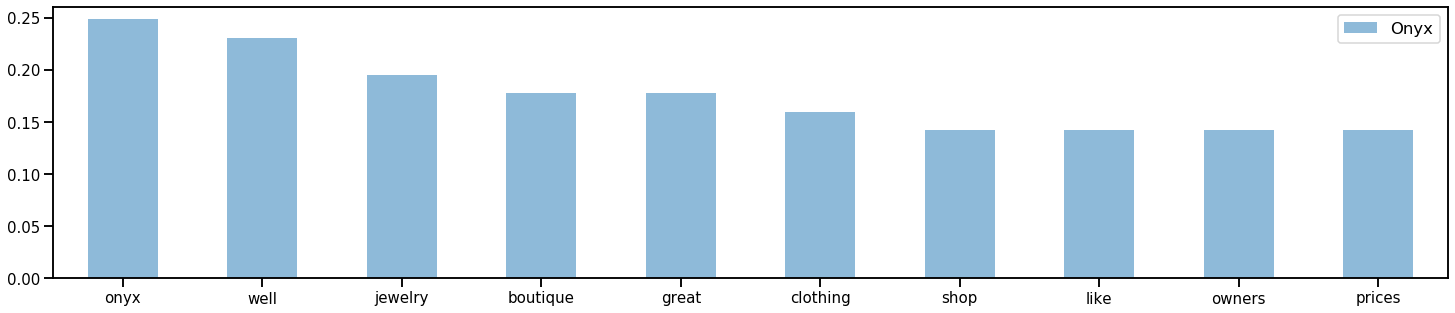

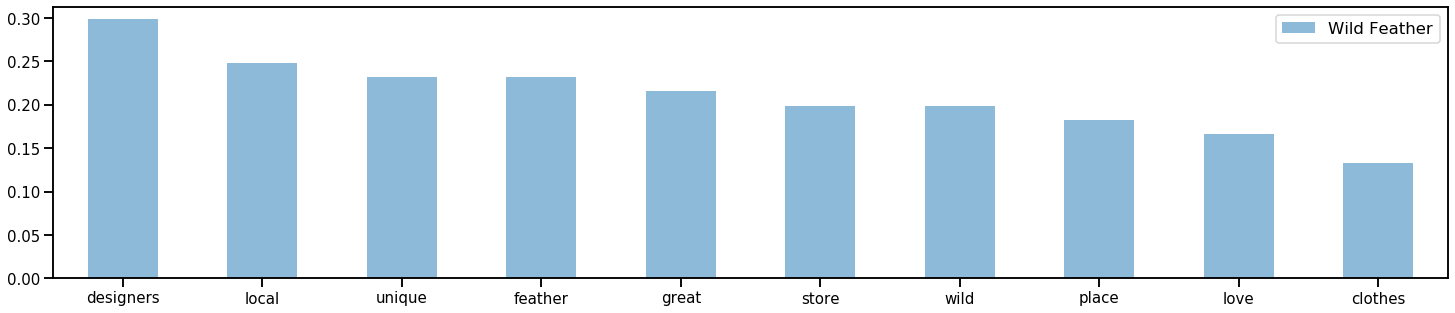

In [99]:
pd.options.display.max_colwidth = 11000 
boutique_list = ["Onyx", "Wild Feather"]
df = get_tfidf(boutique_list)
df

### plot tfidf_scores:

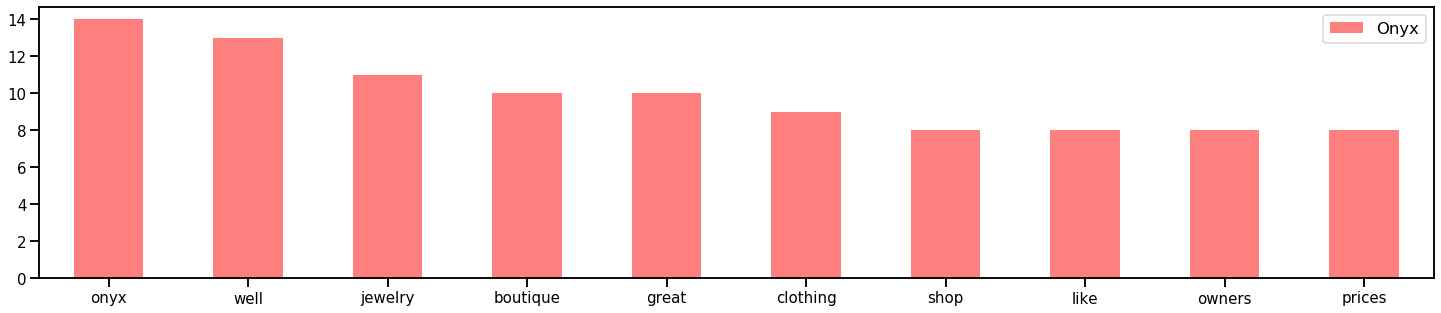

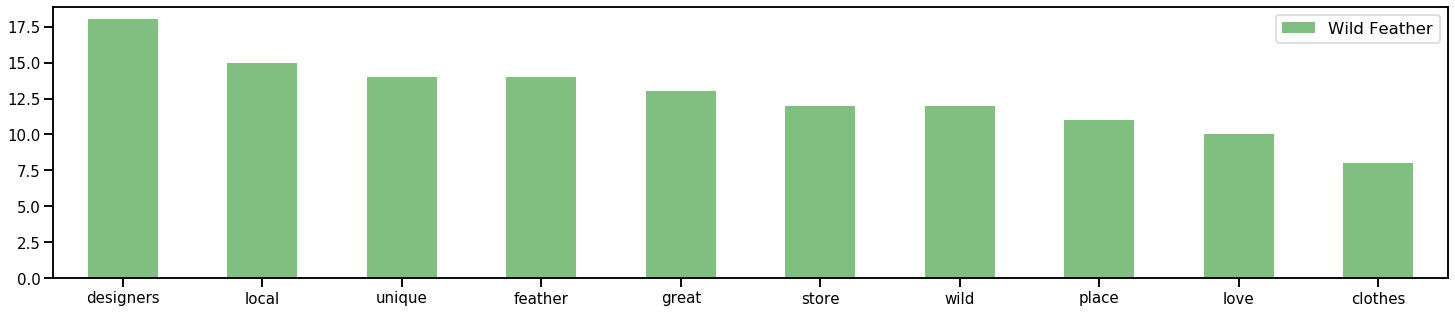

In [95]:
ax=df.iloc[0:10].plot.bar(rot=0, fontsize=15,alpha = 0.5, color = 'r')
ax.legend([df['boutique_name'].iloc[0]])
ax=df.iloc[10:20].plot.bar(rot=0, fontsize=15,alpha = 0.5, color = 'g')
ax.legend([df['boutique_name'].iloc[10]])
plt.show()